# Processing demographics from Qualtrics to a dataframe

In this notebook, we process the raw file with participant's demographics collected via Qualtrics. During the sessions, we have collected

- age
- weight and height
- native language
- other languages spoken/signed
- ethnicity
- learning disabilities
- vision correction
- handedness (EHI)
- familiarity with the experimental partner
- Big Five Inventory (BFI)


In [89]:
import os
import glob
import pandas as pd

curfolder = os.getcwd()
demofolder = curfolder + '/Demographics_all/'

# Find csv file with 'demo'
demo = glob.glob(demofolder + '*Qualtrics*.csv')
print(demo)

# Load in the file
df = pd.read_csv(demo[0], sep=',', header=1, encoding='utf-8')
df.head()


['e:\\FLESH_ContinuousBodilyEffort\\00_RAWDATA/Demographics_all\\Qualtrics_demo.csv']


,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,"Ik zie mezelf als iemand die...\n\n\n\nNogmaals, de antwoordschaal is\n\n1. Helemaal oneens 2. Oneens 3. Niet eens én niet oneens 4. Eens 5. Helemaal eens - Beleefd, hoffelijk naar anderen is","Ik zie mezelf als iemand die...\n\n\n\nNogmaals, de antwoordschaal is\n\n1. Helemaal oneens 2. Oneens 3. Niet eens én niet oneens 4. Eens 5. Helemaal eens - Volhoudend is, werkt tot de taak af is","Ik zie mezelf als iemand die...\n\n\n\nNogmaals, de antwoordschaal is\n\n1. Helemaal oneens 2. Oneens 3. Niet eens én niet oneens 4. Eens 5. Helemaal eens - Ertoe neigt zich teneergeslagen, somber te voelen","Ik zie mezelf als iemand die...\n\n\n\nNogmaals, de antwoordschaal is\n\n1. Helemaal oneens 2. Oneens 3. Niet eens én niet oneens 4. Eens 5. Helemaal eens - Weinig interesse in abstracte ideeën heeft","Ik zie mezelf als iemand die...\n\n\n\nNogmaals, de antwoordschaal is\n\n1. Helemaal oneens 2. Oneens 3. Niet eens én niet oneens 4. Eens 5. Helemaal eens - Veel enthousiasme en uitbundigheid uitstraalt","Ik zie mezelf als iemand die...\n\n\n\nNogmaals, de antwoordschaal is\n\n1. Helemaal oneens 2. Oneens 3. Niet eens én niet oneens 4. Eens 5. Helemaal eens - Van het beste in mensen uitgaat","Ik zie mezelf als iemand die...\n\n\n\nNogmaals, de antwoordschaal is\n\n1. Helemaal oneens 2. Oneens 3. Niet eens én niet oneens 4. Eens 5. Helemaal eens - Zich soms onverantwoordelijk en ondoordacht gedraagt","Ik zie mezelf als iemand die...\n\n\n\nNogmaals, de antwoordschaal is\n\n1. Helemaal oneens 2. Oneens 3. Niet eens én niet oneens 4. Eens 5. Helemaal eens - Opvliegend is, makkelijk emotioneel wordt","Ik zie mezelf als iemand die...\n\n\n\nNogmaals, de antwoordschaal is\n\n1. Helemaal oneens 2. Oneens 3. Niet eens én niet oneens 4. Eens 5. Helemaal eens - Origineel is, met nieuwe ideeën komt","Mochten je zaken zijn opgevallen tijdens het experiment, of mocht je nog feedback voor ons hebben, laat het dan graag voor ons achter!"
0,"{""ImportId"":""startDate"",""timeZone"":""Europe/Ber...","{""ImportId"":""endDate"",""timeZone"":""Europe/Berlin""}","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""Europe/...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID20_52""}","{""ImportId"":""QID20_53""}","{""ImportId"":""QID20_54""}","{""ImportId"":""QID20_55""}","{""ImportId"":""QID20_56""}","{""ImportId"":""QID20_57""}","{""ImportId"":""QID20_58""}","{""ImportId"":""QID20_59""}","{""ImportId"":""QID20_60""}","{""ImportId"":""QID24_TEXT""}"
1,2023-12-07 16:48:20,2023-12-07 16:53:24,IP Address,145.116.135.80,100,303,True,2023-12-07 16:53:24,R_2fB9Dkfv7Obc9e9,NaN,...,3,3,4,4,3,4,4,3,3,NaN
2,2023-12-07 16:49:15,2023-12-07 16:58:46,IP Address,188.206.69.135,100,571,True,2023-12-07 16:58:47,R_2WY9ZKZINgQ7yJi,NaN,...,5,5,1,2,5,5,2,1,5,NaN
3,2023-12-13 14:26:59,2023-12-13 14:57:10,IP Address,213.124.169.4,100,1810,True,2023-12-13 14:57:11,R_2QLphl5r9ABcxNB,NaN,...,4,3,3,2,4,2,3,4,2,NaN
4,2023-12-13 14:31:31,2023-12-13 15:16:21,IP Address,145.116.163.40,100,2690,True,2023-12-13 15:16:22,R_BLAi8JbwyEFpFLP,NaN,...,4,3,3,2,2,5,3,2,4,NaN


## Cleaning the data

In [90]:
# Get rid of the 0th row
df = df.drop(0, axis=0)

# Drop cols that have only NAs
df = df.dropna(axis=1, how='all')

# Get rid of some superfluous columns
df = df.drop(['End Date', 'Response Type', 'Recorded Date', 'IP Address', 'Progress', 
              'Finished', 'Response ID', 'Location Latitude', 'Location Longitude', 
              'Distribution Channel', 'User Language'], axis=1)
df.head()

,Start Date,Duration (in seconds),Wat is je participant-ID (toegewezen door de onderzoeker)?,Hoe oud ben je?,Wat is je biologische geslacht (dat bij je geboorte is toegekend)?,Met welke van de onderstaande genders identificeer je je het meest?,Wat zijn je moedertalen?,"Welke andere (gebaren)talen spreek je? Geef voor iedere van deze je vaardigheid aan. (basiskennis / goede kennis / vloeiend)\n\nBijvoorbeeld: Engels (vloeiend), Duits (basiskennis), etc.","Met welke etnische groepen identificeer je je?\n\n(Bijvoorbeeld Nederlands, of een andere Europese groep, Turks, Koerdisch, Marokkaans, Surinaams, Antilliaans, Afrikaans, creools, Hindoestaans, Aziatisch)\n\nJe kunt ook antwoorden met 'Zeg ik liever niet' of 'Weet ik niet'.",Wat is je gewicht (zoals gemeten in het lab)?,...,"Ik zie mezelf als iemand die...\n\n\n\nNogmaals, de antwoordschaal is\n\n1. Helemaal oneens 2. Oneens 3. Niet eens én niet oneens 4. Eens 5. Helemaal eens - Beleefd, hoffelijk naar anderen is","Ik zie mezelf als iemand die...\n\n\n\nNogmaals, de antwoordschaal is\n\n1. Helemaal oneens 2. Oneens 3. Niet eens én niet oneens 4. Eens 5. Helemaal eens - Volhoudend is, werkt tot de taak af is","Ik zie mezelf als iemand die...\n\n\n\nNogmaals, de antwoordschaal is\n\n1. Helemaal oneens 2. Oneens 3. Niet eens én niet oneens 4. Eens 5. Helemaal eens - Ertoe neigt zich teneergeslagen, somber te voelen","Ik zie mezelf als iemand die...\n\n\n\nNogmaals, de antwoordschaal is\n\n1. Helemaal oneens 2. Oneens 3. Niet eens én niet oneens 4. Eens 5. Helemaal eens - Weinig interesse in abstracte ideeën heeft","Ik zie mezelf als iemand die...\n\n\n\nNogmaals, de antwoordschaal is\n\n1. Helemaal oneens 2. Oneens 3. Niet eens én niet oneens 4. Eens 5. Helemaal eens - Veel enthousiasme en uitbundigheid uitstraalt","Ik zie mezelf als iemand die...\n\n\n\nNogmaals, de antwoordschaal is\n\n1. Helemaal oneens 2. Oneens 3. Niet eens én niet oneens 4. Eens 5. Helemaal eens - Van het beste in mensen uitgaat","Ik zie mezelf als iemand die...\n\n\n\nNogmaals, de antwoordschaal is\n\n1. Helemaal oneens 2. Oneens 3. Niet eens én niet oneens 4. Eens 5. Helemaal eens - Zich soms onverantwoordelijk en ondoordacht gedraagt","Ik zie mezelf als iemand die...\n\n\n\nNogmaals, de antwoordschaal is\n\n1. Helemaal oneens 2. Oneens 3. Niet eens én niet oneens 4. Eens 5. Helemaal eens - Opvliegend is, makkelijk emotioneel wordt","Ik zie mezelf als iemand die...\n\n\n\nNogmaals, de antwoordschaal is\n\n1. Helemaal oneens 2. Oneens 3. Niet eens én niet oneens 4. Eens 5. Helemaal eens - Origineel is, met nieuwe ideeën komt","Mochten je zaken zijn opgevallen tijdens het experiment, of mocht je nog feedback voor ons hebben, laat het dan graag voor ons achter!"
1,2023-12-07 16:48:20,303,1_0,21,vrouw,vrouw,Nederlands,Engels (basis),Nederlands,64,...,3,3,4,4,3,4,4,3,3,NaN
2,2023-12-07 16:49:15,571,1_1,20,vrouw,vrouw,Nederlands,Engels (vloeiend) Duits (goede kennis) Russisc...,Russisch,"62,9kg",...,5,5,1,2,5,5,2,1,5,NaN
3,2023-12-13 14:26:59,1810,1774457,25,man,man,Nederlands,Engels goede kennis,Nederlands,83,...,4,3,3,2,4,2,3,4,2,NaN
4,2023-12-13 14:31:31,2690,1.1,23,man,man,Nederlands,Engels (goede kennis),Nederlands,81,...,4,3,3,2,2,5,3,2,4,NaN
5,2023-12-14 12:35:13,255,2_1,25,man,man,nederlands,engels frans,nederlands,80 kg,...,4,4,4,2,5,1,2,3,5,NaN


## Feedback from participants

In [91]:
# Last column is feedback from people, we want to save it separately to have it accessible if we need it
feedback = df.iloc[:, -1]
feedback = feedback.dropna() # drop rows with NaN
feedback.head(18)

# Save it
feedback.to_csv(demofolder + '\\feedback.csv', index=False, header=False)

# We can get rid of it in df
df = df.drop(df.columns[-1], axis=1)


## Renaming columns

In [92]:
# Let's make a dictionary of col index and new name
colnames = {0: 'date', 1: 'duration_sec', 2: 'pcn_ID', 
            3: 'age', 4: 'sex', 5: 'gender', 6: 'natlang', 
            7: 'langs', 8: 'ethnic', 9: 'weight', 10: 'height', 
            11: 'poor_vision', 12: 'dyslexia', 13: 'dysgraphia', 
            14: 'dyscalculia', 15: 'dyspraxia', 16: 'rel_familiarity', 
            17: 'rel_comfort', 18: 'hand_left_tendency', 19: 'hand_writing', 
            20: 'hand_drawing', 21: 'hand_throwing', 22: 'hand_scissors', 
            23: 'hand_toothbrush', 24: 'hand_knife', 25: 'hand_spoon', 
            26: 'hand_broom', 27: 'hand_matchstriking', 28: 'hand_boxopening',
            29: 'hand_footkick', 30: 'hand_eyedominance', 31: 'bfi_communicative', 
            32: 'bfi_involved', 33: 'bfi_careless', 34: 'bfi_relaxed', 35: 'bfi_artuninterested', 
            36: 'bfi_standupforthemselves', 37: 'bfi_respectful', 38: 'bfi_lazy', 39: 'bfi_optimistic', 
            40: 'bfi_curious', 41: 'bfi_rarelyeager', 42: 'bfi_lookforfaultswithothers', 43: 'bfi_responsible', 
            44: 'bfi_moody', 45: 'bfi_resourceful', 46: 'bfi_quiet', 47: 'bfi_sympathy', 48: 'bfi_systematic', 
            49: 'bfi_tense', 50: 'bfi_fascinatedbyart', 51: 'bfi_leader', 52: 'bfi_quicktoargue', 
            53: 'bfi_difficultystartingtask', 54: 'bfi_confident', 55: 'bfi_shunsintellectualdiscussions', 
            56: 'bfi_lesslively', 57: 'bfi_forgiving', 58: 'bfi_negligent', 59: 'bfi_emotionallystable', 
            60: 'bfi_littlecreativity', 61: 'bfi_shy', 62: 'bfi_helpful', 63: 'bfi_tidy', 64: 'bfi_worries', 
            65: 'bfi_valuebeauty', 66: 'bfi_difficultyconvincingothers', 67: 'bfi_rude', 
            68: 'bfi_efficient', 69: 'bfi_oftensad', 
            70: 'bfi_deepthinking', 71: 'bfi_fullofenergy', 72: 'bfi_notassuminggoodintentions', 
            73: 'bfi_reliable', 74: 'bfi_emotionsundercontrol', 75: 'bfi_littleimagination', 
            76: 'bfi_speaksup', 
            77: 'bfi_cold', 78: 'bfi_messesup', 79: 'bfi_rarelyanxious', 80: 'bfi_dramaisboring', 
            81: 'bfi_prefersothertakinglead', 82: 'bfi_polite', 83: 'bfi_persistent', 84: 'bfi_gloomy', 
            85: 'bfi_nointerestinabstractideas', 86: 'bfi_enthusiasm', 87: 'bfi_assumesthebestinpeople', 
            88: 'bfi_irresponsible', 89: 'bfi_temper', 90: 'bfi_original'}

# Map numerical indices to actual column names
colnames_actual = {df.columns[k]: v for k, v in colnames.items() if k < len(df.columns)}

# Rename the columns
df = df.rename(columns=colnames_actual)

df.head(20)

,date,duration_sec,pcn_ID,age,sex,gender,natlang,langs,ethnic,weight,...,bfi_prefersothertakinglead,bfi_polite,bfi_persistent,bfi_gloomy,bfi_nointerestinabstractideas,bfi_enthusiasm,bfi_assumesthebestinpeople,bfi_irresponsible,bfi_temper,bfi_original
1,2023-12-07 16:48:20,303,1_0,21,vrouw,vrouw,Nederlands,Engels (basis),Nederlands,64,...,4,3,3,4,4,3,4,4,3,3
2,2023-12-07 16:49:15,571,1_1,20,vrouw,vrouw,Nederlands,Engels (vloeiend) Duits (goede kennis) Russisc...,Russisch,"62,9kg",...,2,5,5,1,2,5,5,2,1,5
3,2023-12-13 14:26:59,1810,1774457,25,man,man,Nederlands,Engels goede kennis,Nederlands,83,...,2,4,3,3,2,4,2,3,4,2
4,2023-12-13 14:31:31,2690,1.1,23,man,man,Nederlands,Engels (goede kennis),Nederlands,81,...,4,4,3,3,2,2,5,3,2,4
5,2023-12-14 12:35:13,255,2_1,25,man,man,nederlands,engels frans,nederlands,80 kg,...,2,4,4,4,2,5,1,2,3,5
6,2023-12-14 12:37:36,359,2-0,23,man,man,Nederlands,Engels (vloeiend) frans (basiskennis),Nederlands,67 kg,...,4,4,3,2,1,4,5,2,1,3
7,2023-12-20 13:59:44,290,4_0,18,vrouw,vrouw,Nederlands,Engels (vloeiend) Frans (basiskennis),Nederlands,"79,0",...,1,2,1,2,2,4,2,3,2,5
8,2023-12-20 14:00:36,431,4-1,18,vrouw,vrouw,Nederlands,Engels (goeie kennis),Nederlands,"70,5",...,4,5,2,3,3,5,5,2,3,1
9,2023-12-21 12:31:33,508,51,22,vrouw,vrouw,Nederlands,"Basiskennis gebarentaal, engels goede kennis d...",Nederlands,71,...,2,5,4,3,2,3,3,2,2,3
10,2023-12-21 12:31:42,514,50,19,vrouw,vrouw,Nederlands,Engels,Nederlander,63,...,4,4,4,5,2,3,3,2,3,4


## Managing incorrect participant IDs

We need to change some pcn_ID because people sometimes put something wrong

In [93]:
# 1_0 is 0_0
df['pcn_ID'] = df['pcn_ID'].replace('1_0', '0_0')
# 1_1 is 0_1
df['pcn_ID'] = df['pcn_ID'].replace('1_1', '0_1')
# 1774457 is 1_0
df['pcn_ID'] = df['pcn_ID'].replace('1774457', '1_0')
# 1.1 is 1_1
df['pcn_ID'] = df['pcn_ID'].replace('1.1', '1_1')
# 32 is 32_1
df['pcn_ID'] = df['pcn_ID'].replace('32', '32_1')
# 192586 is 32_2
df['pcn_ID'] = df['pcn_ID'].replace('192586', '32_2')
# 188950 is 43_1
df['pcn_ID'] = df['pcn_ID'].replace('188950', '43_1')
# 187750 is 42_1
df['pcn_ID'] = df['pcn_ID'].replace('187750', '42_1')
# 186658 is 42_0
df['pcn_ID'] = df['pcn_ID'].replace('186658', '42_0')
# 177424 is 60_1
df['pcn_ID'] = df['pcn_ID'].replace('177424', '60_1')
# 177439 is 60_0
df['pcn_ID'] = df['pcn_ID'].replace('177439', '60_0')
# two are with 16_0
df.loc[(df['pcn_ID'] == 'P16_0') & (df['height'] == '170'), 'pcn_ID'] = '16_0'
df.loc[(df['pcn_ID'] == 'P16_0') & (df['height'] == '182'), 'pcn_ID'] = '16_1'

# Now some corrections to the formant
df['pcn_ID'] = df['pcn_ID'].str.replace('-', '_')
df['pcn_ID'] = df['pcn_ID'].str.replace('o', '0')
df['pcn_ID'] = df['pcn_ID'].str.replace('.', '_')
df.loc[(df['pcn_ID'] == '51') & (df['age'] == '22'), 'pcn_ID'] = '5_1'
df.loc[(df['pcn_ID'] == '50') & (df['age'] == '19'), 'pcn_ID'] = '5_0'
df.loc[(df['pcn_ID'] == '0') & (df['age'] == '18'), 'pcn_ID'] = '33_0'

In [94]:
# How many unique pcn_IDs do we have?
df['pcn_ID'].nunique()


146

## Handedness (EHI)

In [95]:
# Separate handedness columns
df_handedness = df[['pcn_ID'] + [col for col in df.columns if 'hand_' in col]]

# Display
df_handedness.head(10)

,pcn_ID,hand_left_tendency,hand_writing,hand_drawing,hand_throwing,hand_scissors,hand_toothbrush,hand_knife,hand_spoon,hand_broom,hand_matchstriking,hand_boxopening,hand_footkick,hand_eyedominance
1,0_0,Nee,5,5,5,5,5,5,5,5,5,5,5,3
2,0_1,Nee,4,5,5,5,5,5,5,5,5,5,5,5
3,1_0,Ja,1,1,2,2,1,1,1,1,1,2,2,2
4,1_1,Nee,5,5,5,5,4,5,5,5,5,4,5,1
5,2_1,Nee,5,5,5,5,5,5,5,5,5,5,5,5
6,2_0,Ja,1,1,5,5,3,4,2,3,5,1,5,5
7,4_0,Nee,5,5,5,5,5,5,5,5,5,5,5,5
8,4_1,Nee,5,5,5,5,5,5,5,5,5,3,5,5
9,5_1,Nee,5,5,5,5,5,1,5,5,5,5,5,3
10,5_0,Nee,5,5,4,3,4,5,5,4,4,4,4,2


The original scaling of EHI is from -2 (Left dominance) to +2 (Right dominance). We need to convert our 1-5 scale to this one.

In [96]:
# All cols need to be numeric
df_handedness.iloc[:, 2:] = df_handedness.iloc[:, 2:].apply(pd.to_numeric)

# Create re-scaling dictionary
scale = {1: -2, 2: -1, 3: 0, 4: 1, 5: 2}

# Replace values
df_handedness.iloc[:, 2:] = df_handedness.iloc[:, 2:].replace(scale)
# Make sure it's numeric again
df_handedness.iloc[:, 2:] = df_handedness.iloc[:, 2:].apply(pd.to_numeric)

C:\Users\kadava\AppData\Local\Temp\ipykernel_12436\3802680274.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_handedness.iloc[:, 2:] = df_handedness.iloc[:, 2:].replace(scale)


Following the original EHI procedure, we will now determine the nominal handedness (defined by the preference for writing) and also calculate the laterality quotient (LQ).

In [97]:
def calculate_laterality_quotient(scores):
    """
    Calculate the Laterality Quotient (LQ) based on EHI scores.
    
    Parameters:
    scores (list of int): A list of scores, where positive values indicate preference for one side,
                          and negative values indicate preference for the opposite side.
    
    Returns:
    float: The Laterality Quotient (LQ), ranging from -100 to 100.
    """
    sum_positive = sum(x for x in scores if x > 0)
    sum_negative = sum(abs(x) for x in scores if x < 0)
    
    if sum_positive + sum_negative == 0:
        return 0  # Avoid division by zero if all scores are zero.
    
    lq = ((sum_positive - sum_negative) / (sum_positive + sum_negative)) * 100
    return lq

In [98]:
# Prepare empty df
hand_final = pd.DataFrame()
hand_final['pcn_ID'] = df_handedness['pcn_ID']

# EHI nominal
hand_final['EHI_nominal'] = df_handedness.apply(lambda x: 'L' if x['hand_writing'] < 0 else 'R' if x['hand_writing'] > 0 else 'A', axis=1)

# EHI LQ
for i, row in df_handedness.iterrows():
    scores = row.iloc[2:-2].values
    hand_final.loc[i, 'EHI_lq'] = calculate_laterality_quotient(scores)

# Now interpret the LQ
hand_final['EHI_lq_cat'] = hand_final.apply(lambda x: 'L' if x['EHI_lq'] <= -1 else 'R' if x['EHI_lq'] >= 1 else 'A', axis=1)

# Display
hand_final.head(20)

,pcn_ID,EHI_nominal,EHI_lq,EHI_lq_cat
1,0_0,R,100.000000,R
2,0_1,R,100.000000,R
3,1_0,L,-100.000000,L
4,1_1,R,100.000000,R
5,2_1,R,100.000000,R
6,2_0,L,0.000000,A
7,4_0,R,100.000000,R
8,4_1,R,100.000000,R
9,5_1,R,80.000000,R
10,5_0,R,100.000000,R


In [99]:
# Now let us look at the distribution of the categories in our data
print('Left-handed: ', hand_final[hand_final['EHI_lq_cat'] == 'L'].shape[0])
print('Righ-handed: ', hand_final[hand_final['EHI_lq_cat'] == 'R'].shape[0])
print('Ambidextrous: ', hand_final[hand_final['EHI_lq_cat'] == 'A'].shape[0])

Left-handed:  13
Righ-handed:  132
Ambidextrous:  1


In [100]:
# Save it
hand_final.to_csv(demofolder + '\\handedness_all.csv', index=False)

# Big Five Inventory (BFI)

In [101]:
# Separate BFI columns
df_bfi = df[['pcn_ID'] + [col for col in df.columns if 'bfi_' in col]]

# Rename all the BFI cols to numbers
df_bfi.columns = ['pcn_ID'] + [str(i) for i in range(1, len(df_bfi.columns))]

# Display
df_bfi.head(10)

,pcn_ID,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
1,0_0,3,4,3,4,4,4,4,4,5,...,4,3,3,4,4,3,4,4,3,3
2,0_1,5,4,1,4,1,5,5,2,5,...,2,5,5,1,2,5,5,2,1,5
3,1_0,5,4,2,3,3,5,4,2,4,...,2,4,3,3,2,4,2,3,4,2
4,1_1,5,4,4,4,3,2,4,2,4,...,4,4,3,3,2,2,5,3,2,4
5,2_1,5,4,5,5,2,5,5,3,2,...,2,4,4,4,2,5,1,2,3,5
6,2_0,4,4,2,5,2,2,5,1,5,...,4,4,3,2,1,4,5,2,1,3
7,4_0,5,3,5,2,2,5,3,5,2,...,1,2,1,2,2,4,2,3,2,5
8,4_1,4,4,3,1,1,1,5,3,1,...,4,5,2,3,3,5,5,2,3,1
9,5_1,4,5,3,2,4,3,5,3,4,...,2,5,4,3,2,3,3,2,2,3
10,5_0,4,4,4,4,2,4,5,4,3,...,4,4,4,5,2,3,3,2,3,4


These are the domain scales

Domain Scales
Extraversion: 1, 6, 11R, 16R, 21, 26R, 31R, 36R, 41, 46, 51R, 56
Agreeableness: 2, 7, 12R, 17R, 22R, 27, 32, 37R, 42R, 47R, 52, 57
Conscientiousness: 3R, 8R, 13, 18, 23R, 28R, 33, 38, 43, 48R, 53, 58R
Negative Emotionality: 4R, 9R, 14, 19, 24R, 29R, 34, 39, 44R, 49R, 54, 59
Open-Mindedness: 5R, 10, 15, 20, 25R, 30R, 35, 40, 45R, 50R, 55R, 60

R means the items have reverse scale, so we have to convert it first

In [102]:
# Dictionary to reverse the values
scale = {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}

# These are items with reversed scale
reversed = [11, 16, 26, 31, 36, 51, 12, 17, 22, 37, 42, 47, 3, 8, 23, 28, 48, 58, 4, 9, 24, 29, 44, 49, 5, 25, 30, 45, 50, 55]

# All cols should be numerical
df_bfi.iloc[:,1:] = df_bfi.iloc[:,1:].apply(pd.to_numeric)

# Replace the values for those that are reversed
for col in reversed:
    df_bfi.iloc[:,col] = df_bfi.iloc[:,col].replace(scale)


C:\Users\kadava\AppData\Local\Temp\ipykernel_12436\3223831828.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bfi.iloc[:,col] = df_bfi.iloc[:,col].replace(scale)


Now we can sum the values for each domain

In [103]:
# These are the domains
extra = [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56]
agree = [2, 7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57]
consc = [3, 8, 13, 18, 23, 28, 33, 38, 43, 48, 53, 58]
negemo = [4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59]
open = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

# This will be our final df
bfi_final = pd.DataFrame()
bfi_final['pcn_ID'] = df_bfi['pcn_ID']

# Make all cols numerical
df_bfi.iloc[:,1:] = df_bfi.iloc[:,1:].apply(pd.to_numeric)

# For each trait, sum the values (see list above), per participant
for i, row in df_bfi.iterrows():
    extra_sum = row[extra].sum()
    agree_sum = row[agree].sum()
    consc_sum = row[consc].sum()
    negemo_sum = row[negemo].sum()
    open_sum = row[open].sum()
    
    bfi_final.loc[i, 'BFI_extra'] = extra_sum
    bfi_final.loc[i, 'BFI_agree'] = agree_sum
    bfi_final.loc[i, 'BFI_consc'] = consc_sum
    bfi_final.loc[i, 'BFI_negemo'] = negemo_sum
    bfi_final.loc[i, 'BFI_open'] = open_sum

# Z-score all BFI cols
bfi_final.iloc[:,1:] = bfi_final.iloc[:,1:].apply(lambda x: (x - x.mean()) / x.std())

# Save it
bfi_final.to_csv(demofolder + '\\bfi_all.csv', index=False)


C:\Users\kadava\AppData\Local\Temp\ipykernel_12436\2174683557.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  extra_sum = row[extra].sum()
C:\Users\kadava\AppData\Local\Temp\ipykernel_12436\2174683557.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  agree_sum = row[agree].sum()
C:\Users\kadava\AppData\Local\Temp\ipykernel_12436\2174683557.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  consc_sum = row[consc].sum()
C:\U

## Assembling all to one df

In [104]:
# Get rid of all EHI and BFI cols from the original df
df = df.drop([col for col in df.columns if 'hand_' in col], axis=1)
df = df.drop([col for col in df.columns if 'bfi_' in col], axis=1)

# Now merge df with hand_final and bfi_final on pcn_ID
df_final = df.merge(hand_final, on='pcn_ID')
df_final = df_final.merge(bfi_final, on='pcn_ID')

# Display
df_final.head(20)

,date,duration_sec,pcn_ID,age,sex,gender,natlang,langs,ethnic,weight,...,rel_familiarity,rel_comfort,EHI_nominal,EHI_lq,EHI_lq_cat,BFI_extra,BFI_agree,BFI_consc,BFI_negemo,BFI_open
0,2023-12-07 16:48:20,303,0_0,21,vrouw,vrouw,Nederlands,Engels (basis),Nederlands,64,...,1,3,R,100.000000,R,-1.125245,-1.980458,-0.320618,0.014300,-1.989397
1,2023-12-07 16:49:15,571,0_1,20,vrouw,vrouw,Nederlands,Engels (vloeiend) Duits (goede kennis) Russisc...,Russisch,"62,9kg",...,1,7,R,100.000000,R,0.450294,1.101358,1.193458,-1.582304,1.523046
2,2023-12-13 14:26:59,1810,1_0,25,man,man,Nederlands,Engels goede kennis,Nederlands,83,...,7,6,L,-100.000000,L,0.736756,-2.524308,0.184074,0.382748,-1.178834
3,2023-12-13 14:31:31,2690,1_1,23,man,man,Nederlands,Engels (goede kennis),Nederlands,81,...,7,7,R,100.000000,R,-1.268475,-0.711475,-0.446791,-0.968226,-0.368270
4,2023-12-14 12:35:13,255,2_1,25,man,man,nederlands,engels frans,nederlands,80 kg,...,0,2,R,100.000000,R,0.593525,-1.980458,-0.951483,0.874011,0.577388
5,2023-12-14 12:37:36,359,2_0,23,man,man,Nederlands,Engels (vloeiend) frans (basiskennis),Nederlands,67 kg,...,0,6,L,0.000000,A,-1.554937,1.282642,-0.699137,-1.705120,0.307200
6,2023-12-20 13:59:44,290,4_0,18,vrouw,vrouw,Nederlands,Engels (vloeiend) Frans (basiskennis),Nederlands,"79,0",...,6,5,R,100.000000,R,1.452910,-3.612008,-2.213213,0.505563,0.172106
7,2023-12-20 14:00:36,431,4_1,18,vrouw,vrouw,Nederlands,Engels (goeie kennis),Nederlands,"70,5",...,7,7,R,100.000000,R,-1.984629,0.557508,-0.951483,1.365274,-0.233176
8,2023-12-21 12:31:33,508,5_1,22,vrouw,vrouw,Nederlands,"Basiskennis gebarentaal, engels goede kennis d...",Nederlands,71,...,3,5,R,80.000000,R,-0.122629,0.013658,0.310247,0.137116,-0.773552
9,2023-12-21 12:31:42,514,5_0,19,vrouw,vrouw,Nederlands,Engels,Nederlander,63,...,5,5,R,100.000000,R,-0.552321,-1.074042,0.057901,0.137116,0.577388


## Native languages

In [105]:
# Unique values of natlang
df_final['natlang'].unique()

# Make some corrections
df_final['natlang'] = df_final['natlang'].replace('nederlands', 'Nederlands')
df_final['natlang'] = df_final['natlang'].replace('Nederlands ', 'Nederlands')
df_final['natlang'] = df_final['natlang'].replace('Engels, Nederlands', 'Nederlands en engels')
df_final['natlang'] = df_final['natlang'].replace('Nederlandse ', 'Nederlands')
df_final['natlang'] = df_final['natlang'].replace('Dutch', 'Nederlands')
df_final['natlang'] = df_final['natlang'].replace('Nederland', 'Nederlands')

# Counts for each value
df_final['natlang'].value_counts()

natlang
Nederlands                 141
Nederlands en engels         2
Nederlands, Marokkaans       1
Nederlands en Grieks         1
Nederlands en duits          1
Name: count, dtype: int64

I will skip other languages as we are not interested in those for now

## Ethnicity

In [106]:
# Unique values
df_final['ethnic'].unique()

# Corrections
df_final['ethnic'] = df_final['ethnic'].replace('nederlands', 'Nederlands')
df_final['ethnic'] = df_final['ethnic'].replace('Nederlander', 'Nederlands')
df_final['ethnic'] = df_final['ethnic'].replace('Nederlands ', 'Nederlands')
df_final['ethnic'] = df_final['ethnic'].replace('Nederlandse', 'Nederlands')
df_final['ethnic'] = df_final['ethnic'].replace('Nederlands/Duits', 'Nederlands en Duits')
df_final['ethnic'] = df_final['ethnic'].replace( 'nederlands, europees', 'Nederlands')

# Counts for each value
df_final['ethnic'].value_counts()


ethnic
Nederlands                    135
Nederlands en Duits             2
Russisch                        1
Marokkaans                      1
Nederlands, Grieks              1
Nederlands, Moluks              1
Nederlands en Indonesisch       1
Weet ik niet                    1
Nederlands-Frans                1
Nederlands, Surinaams           1
Nederlands en Marokkaans        1
Name: count, dtype: int64

## Weight

In [107]:
# Corrections for weight
df_final['weight'] = df_final['weight'].str.replace('kg', '')
df_final['weight'] = df_final['weight'].str.replace('KG', '')
df_final['weight'] = df_final['weight'].str.replace('Kg', '')
df_final['weight'] = df_final['weight'].str.replace('kilo', '')
df_final['weight'] = df_final['weight'].str.replace(',', '.')
df_final['weight'] = df_final['weight'].str.replace(' ty', '')

# Make weight numerical
df_final['weight'] = pd.to_numeric(df_final['weight'])

<Axes: ylabel='Density'>

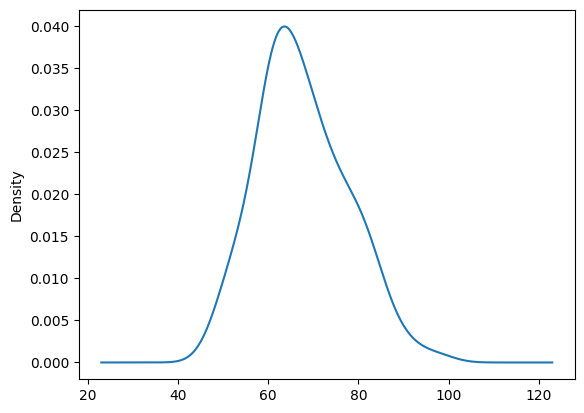

In [108]:
# Density
df_final['weight'].plot(kind='density')

## Height

In [109]:
# Corrections
df_final['height'] = df_final['height'].str.replace(' meter', '')
df_final['height'] = df_final['height'].str.replace('cm', '')
df_final['height'] = df_final['height'].str.replace('m', '')
df_final['height'] = df_final['height'].str.replace('centimeter', '')
df_final['height'] = df_final['height'].str.replace('centieter', '')
df_final['height'] = df_final['height'].str.replace(',', '.')

# Make it numerical
df_final['height'] = pd.to_numeric(df_final['height'])

# If value is > 3, then it is in cm, so divide by 100
df_final.loc[df_final['height'] > 3, 'height'] = df_final.loc[df_final['height'] > 3, 'height'] / 100

<Axes: ylabel='Density'>

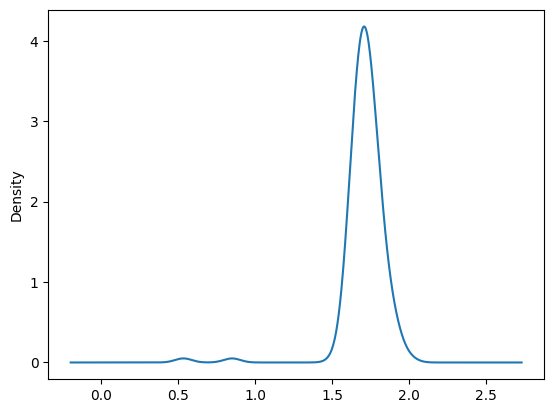

In [110]:
# Density
df_final['height'].plot(kind='density')

## FLAG. There are two values that look weird because they are too small - ut might be people forgot to add 100 cm - check with videos

In [ ]:
##TODO: we will need here to create a txt doc with pcn_ID, height and weight for motion tracking 

## Age

<Axes: ylabel='Density'>

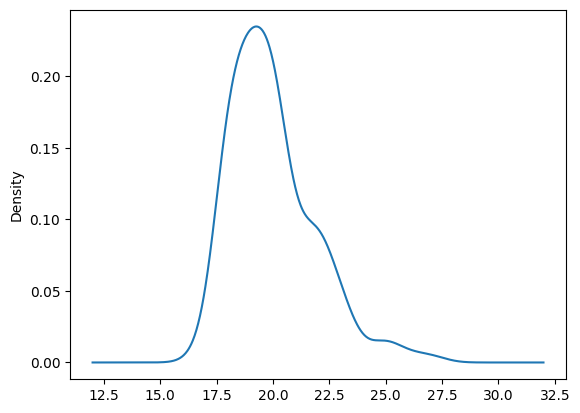

In [111]:
# Age is numerical
df_final['age'] = pd.to_numeric(df_final['age'])
df_final['age'].plot(kind='density')

## Sex

In [112]:
# counts of sex values
df_final['sex'].value_counts()

sex
vrouw    120
man       26
Name: count, dtype: int64

## Gender

In [113]:
# Counts
df_final['gender'].value_counts()

gender
vrouw                 119
man                    24
non-binair              1
anders                  1
zeg ik liever niet      1
Name: count, dtype: int64

## Familiarity

In [114]:
# Make both familiarity cols numerical
df_final['rel_familiarity'] = pd.to_numeric(df_final['rel_familiarity'])
df_final['rel_comfort'] = pd.to_numeric(df_final['rel_comfort'])

# create col Familiarity
df_final['Familiarity'] = df_final['rel_familiarity'] + df_final['rel_comfort']

# Get rid of the original cols
df_final = df_final.drop(['rel_familiarity', 'rel_comfort'], axis=1)

<Axes: ylabel='Density'>

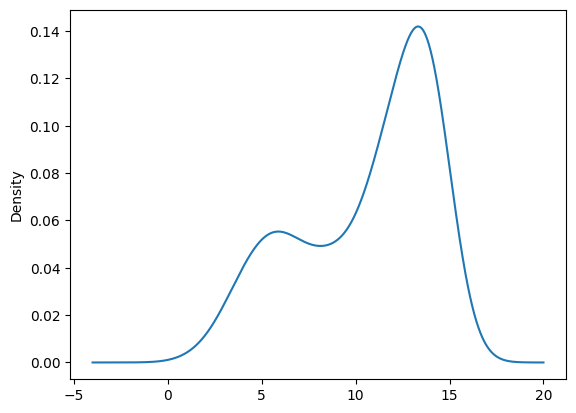

In [115]:
# Density
df_final['Familiarity'].plot(kind='density')

## Disorders

In [116]:
# Counts for dyslexia
df_final['dyslexia'].value_counts()

dyslexia
Nee    136
Ja      10
Name: count, dtype: int64

In [117]:
# Counts for dysgraphia
df_final['dysgraphia'].value_counts()

dysgraphia
Nee    146
Name: count, dtype: int64

In [118]:
# Counts for dyscalculia
df_final['dyscalculia'].value_counts()

dyscalculia
Nee    145
Ja       1
Name: count, dtype: int64

In [119]:
# Counts for dyspraxia
df_final['dyspraxia'].value_counts()

dyspraxia
Nee    146
Name: count, dtype: int64

In [120]:
df_final

,date,duration_sec,pcn_ID,age,sex,gender,natlang,langs,ethnic,weight,...,dyspraxia,EHI_nominal,EHI_lq,EHI_lq_cat,BFI_extra,BFI_agree,BFI_consc,BFI_negemo,BFI_open,Familiarity
0,2023-12-07 16:48:20,303,0_0,21,vrouw,vrouw,Nederlands,Engels (basis),Nederlands,64.0,...,Nee,R,100.000000,R,-1.125245,-1.980458,-0.320618,0.014300,-1.989397,4
1,2023-12-07 16:49:15,571,0_1,20,vrouw,vrouw,Nederlands,Engels (vloeiend) Duits (goede kennis) Russisc...,Russisch,62.9,...,Nee,R,100.000000,R,0.450294,1.101358,1.193458,-1.582304,1.523046,8
2,2023-12-13 14:26:59,1810,1_0,25,man,man,Nederlands,Engels goede kennis,Nederlands,83.0,...,Nee,L,-100.000000,L,0.736756,-2.524308,0.184074,0.382748,-1.178834,13
3,2023-12-13 14:31:31,2690,1_1,23,man,man,Nederlands,Engels (goede kennis),Nederlands,81.0,...,Nee,R,100.000000,R,-1.268475,-0.711475,-0.446791,-0.968226,-0.368270,14
4,2023-12-14 12:35:13,255,2_1,25,man,man,Nederlands,engels frans,Nederlands,80.0,...,Nee,R,100.000000,R,0.593525,-1.980458,-0.951483,0.874011,0.577388,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2024-04-22 12:33:34,670,70_0,23,man,man,Nederlands,Engels (vloeiend),Nederlands en Marokkaans,83.0,...,Nee,R,100.000000,R,0.879986,-1.436608,-0.825310,0.628379,0.982670,11
142,2024-04-25 11:03:21,483,71_1,20,vrouw,vrouw,Nederlands,Engels,Nederlands,75.7,...,Nee,R,89.473684,R,0.020602,-0.530192,0.436420,0.014300,-0.368270,11
143,2024-04-25 11:03:17,563,71_0,22,vrouw,vrouw,Nederlands,"Engels (vloeiend), Duits (basis), Frans (basis)",Nederlands,51.7,...,Nee,R,100.000000,R,0.736756,1.282642,0.310247,0.137116,0.577388,10
144,2024-04-26 12:50:07,519,72_1,23,man,man,Nederlands,"Engels (vloeiend), Duits (basiskennis)",Nederlands,86.0,...,Nee,L,11.111111,R,-0.265860,0.920075,-0.446791,-1.582304,-0.233176,14


## Save the final df

In [121]:
# We also don't need date and duration
df_final = df_final.drop(['date', 'duration_sec'], axis=1)

# Save it
df_final.to_csv(demofolder + '\\all_demodata.csv', index=False)